# E-Commerce Customers
----


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
data = pd.read_csv('/content/Ecommerce Customers.csv')

# Explore Data

In [3]:
data.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [4]:
data.describe().round(2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00,500.00,500.00,500.00,500.00
mean,33.05,12.05,37.06,3.53,499.31
std,0.99,0.99,1.01,1.00,79.31
min,29.53,8.51,33.91,0.27,256.67
25%,32.34,11.39,36.35,2.93,445.04
50%,33.08,11.98,37.07,3.53,498.89
75%,33.71,12.75,37.72,4.13,549.31
max,36.14,15.13,40.01,6.92,765.52


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data.isnull().sum() # to test missing values

,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


In [7]:
data.shape

(500, 8)

# Numerical & Categorical Cols

In [8]:
data_Numerical = data.select_dtypes(include= np.number)
data_categorical = data.select_dtypes(include= 'object')

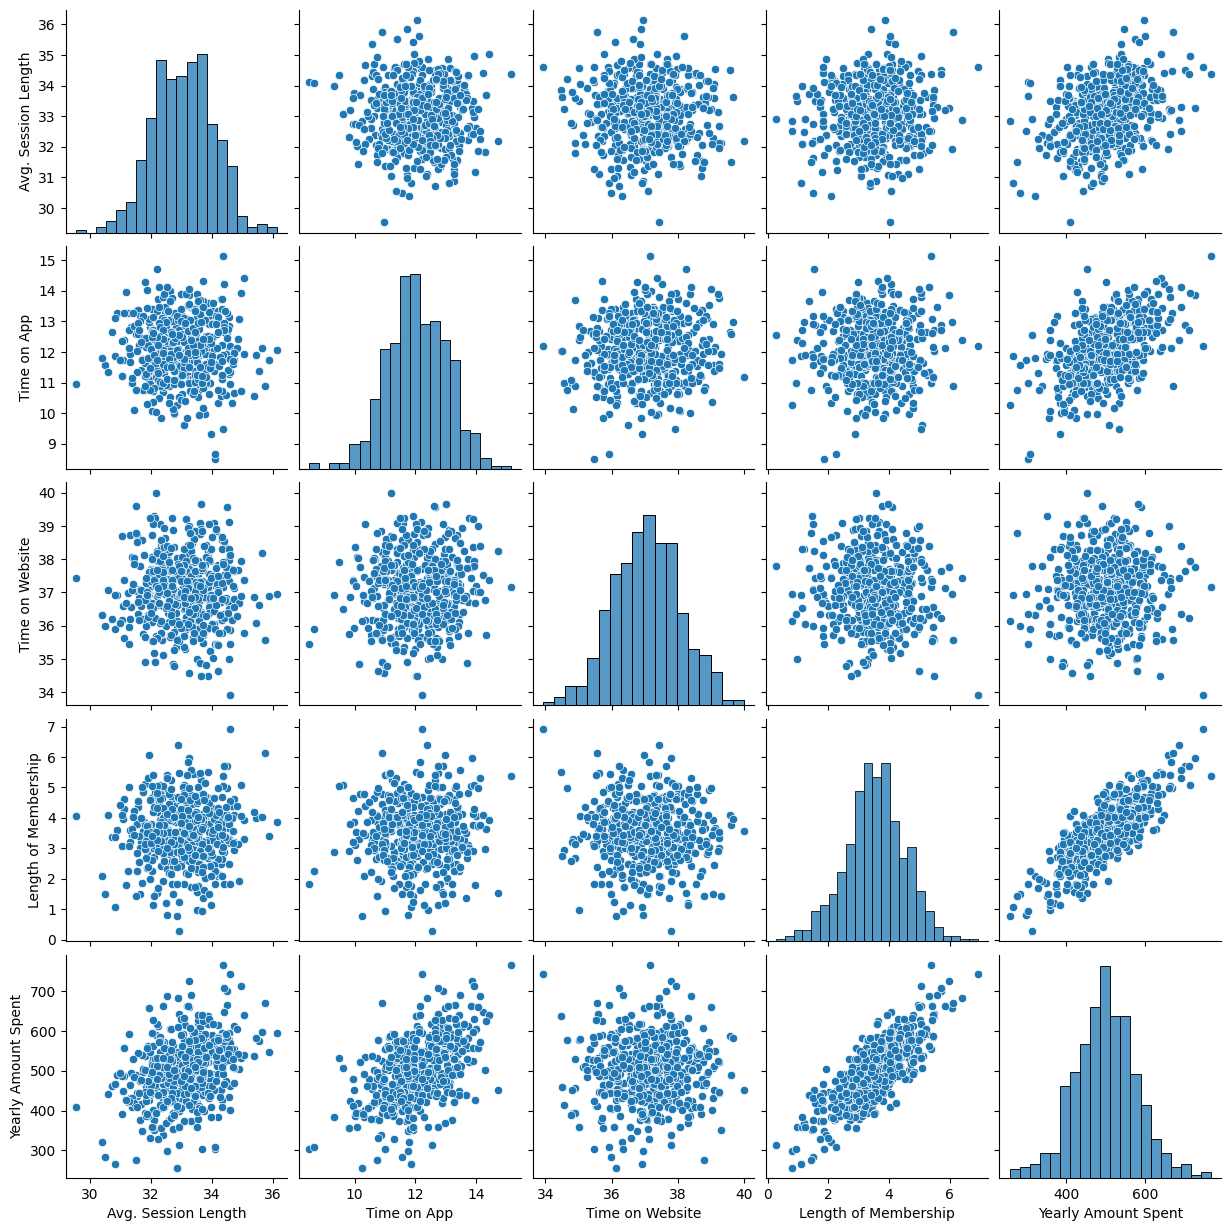

In [9]:
sns.pairplot(data) #to define the relationship between features
plt.show()

In [10]:
corr = data_Numerical.corr()

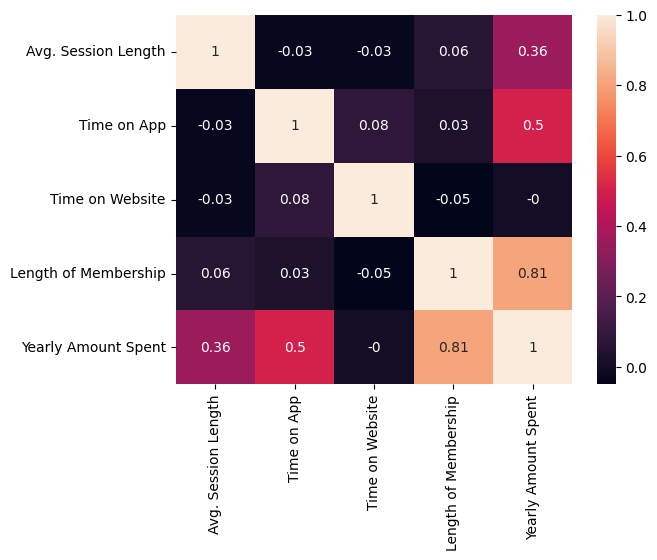

In [11]:
sns.heatmap(np.round(corr,2), annot= True);

In [12]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

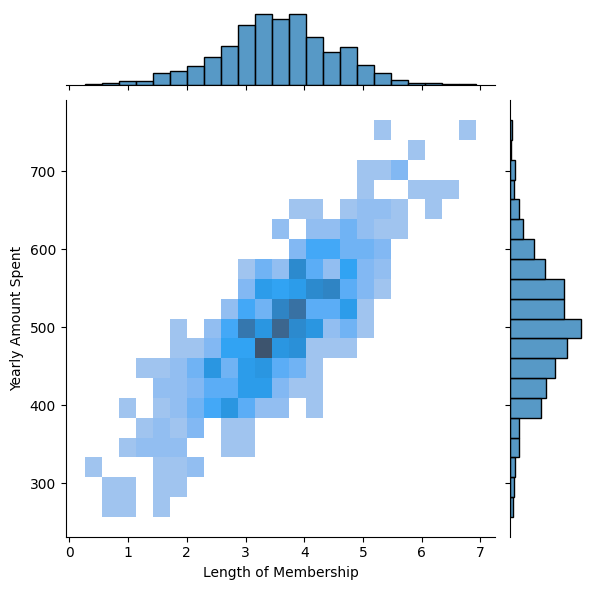

In [13]:
sns.jointplot(data = data , x = 'Length of Membership' , y = 'Yearly Amount Spent' , kind = 'hist')  # kind may be 'scatter', 'hist', 'hex', 'kde', 'reg', 'resid'
plt.show()

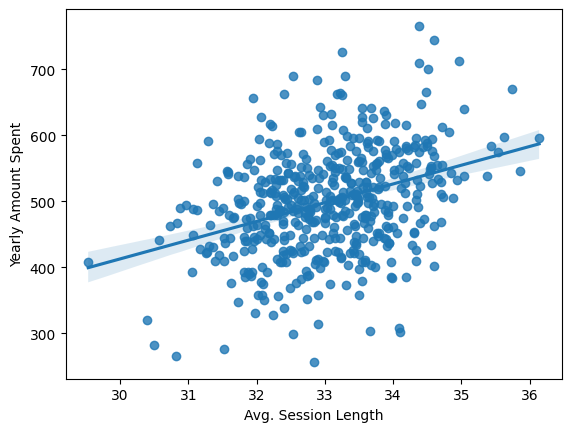

In [14]:
sns.regplot(data = data , x = 'Avg. Session Length', y = 'Yearly Amount Spent')
plt.show()

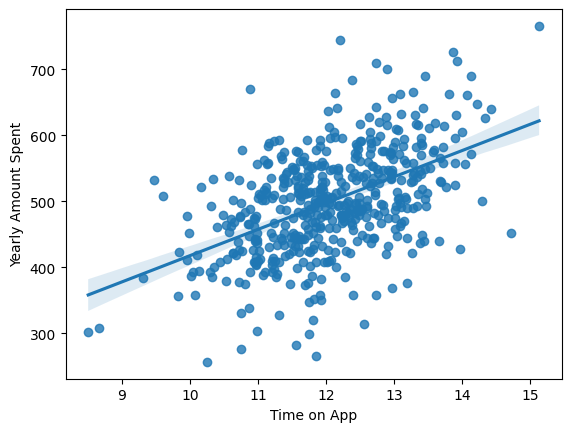

In [15]:
sns.regplot(data = data , x = 'Time on App' , y = 'Yearly Amount Spent')
plt.show()

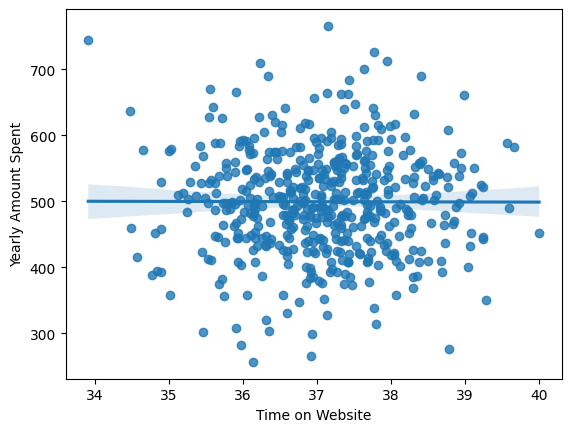

In [16]:
sns.regplot(data = data , x = 'Time on Website' , y = 'Yearly Amount Spent')
plt.show()

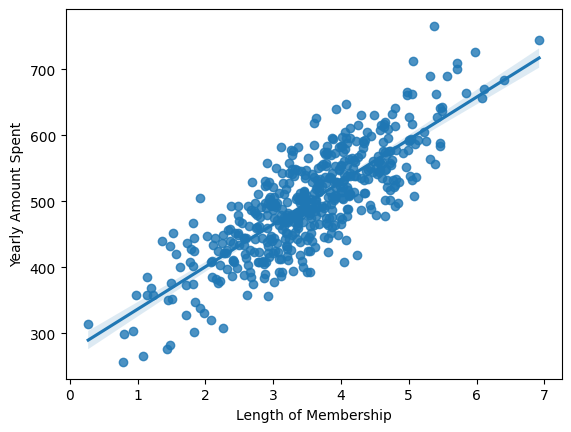

In [17]:
sns.regplot(data = data , x = 'Length of Membership' , y = 'Yearly Amount Spent')
plt.show()

# Data Splitting

In [18]:
data.sample(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
180,jjones@yahoo.com,"047 Carla Locks\nCoreymouth, AR 98066",GreenYellow,32.230149,11.084361,37.959684,4.724027,517.165136
91,audreyjohnson@rosales.com,USCGC Nicholson\nFPO AE 43987-0470,SlateGray,33.616019,13.516284,36.773123,4.125584,611.000025
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448


In [19]:
X = data.drop(['Email','Address','Avatar','Yearly Amount Spent'], axis=1) #Input
y = data['Yearly Amount Spent'] # output

# Split Training Set and Testing Set

In [20]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=0)


In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 4)
(100, 4)
(400,)
(100,)


# Building Models

# Linear Regression

In [22]:
lr = LinearRegression()


In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.score(x_train,y_train)

0.9837380400055443

In [25]:
lr_pr = lr.predict(x_test)

In [26]:
mean_squared_error(y_test,lr_pr)

92.89010304498497

In [27]:
r2_score(y_test,lr_pr)

0.9861924261981548

In [28]:
mean_absolute_error(y_test,lr_pr)

7.645674798915281

In [29]:
lr.coef_    # this will return the coefficients of the features   y = (m1 * x1) + (m2 * x2) + (m3 * x3) + c

array([25.88815047, 38.87046474,  0.47066154, 61.78369022])

# RandomForest Regressor

In [30]:
RF = RandomForestRegressor()

In [31]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
RF.score(x_train,y_train)

0.9918771579053152

In [33]:
RF_pr = RF.predict(x_test)

In [34]:
mean_squared_error(y_test,RF_pr)

584.697808949444

In [35]:
mean_absolute_error(y_test,RF_pr)

16.63616278680552

In [36]:
r2_score(y_test,RF_pr)

0.9130880698352019

# DecisionTree Regressor

In [37]:
DT = DecisionTreeRegressor()

In [38]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [39]:
DT.score(x_train,y_train)    # Overfitting

1.0

In [40]:
DT_pr = DT.predict(x_test)

In [41]:
mean_squared_error(y_test,DT_pr)

1101.6457286078135

In [42]:
mean_squared_error(y_test,DT_pr)

1101.6457286078135

In [43]:
r2_score(y_test,DT_pr)

0.8362467668501402

# KNeighbors Regressor

In [44]:
KN = KNeighborsRegressor()

In [45]:
KN.fit(x_train,y_train)

KNeighborsRegressor()

In [46]:
KN.score(x_train,y_train)

0.9398506070701108

In [47]:
KN_pr = KN.predict(x_test)

In [48]:
mean_squared_error(y_test,KN_pr)

695.0949220607029

In [49]:
mean_absolute_error(y_test,KN_pr)

18.64285135625661

In [50]:
r2_score(y_test,KN_pr)

0.8966781807638531

# SVR

In [51]:
svr = SVR()

In [52]:
svr.fit(x_train,y_train)

SVR()

In [53]:
svr.score(x_train,y_train)

0.01952710603319363

In [54]:
svr_pr = svr.predict(x_test)

In [55]:
mean_squared_error(y_test,svr_pr)

6693.251721472782

In [56]:
mean_absolute_error(y_test,svr_pr)

62.46160090443054

In [57]:
r2_score(y_test,svr_pr)

0.005087042762706329

# Concat All Models in one DataFrame

In [58]:
regrestion_Models = pd.DataFrame({'Model':['LinearRegression','RandomForestRegressor','DecisionTreeRegressor','KNeighborsRegressor','SVR'],
                   'Score':[lr.score(x_train,y_train),RF.score(x_train,y_train),DT.score(x_train,y_train),KN.score(x_train,y_train),
                            svr.score(x_train,y_train)],
                   'MSE':[mean_squared_error(y_test,lr_pr),mean_squared_error(y_test,RF_pr),mean_squared_error(y_test,DT_pr),
                          mean_squared_error(y_test,KN_pr),mean_squared_error(y_test,svr_pr)],
                   'R2':[r2_score(y_test,lr_pr),r2_score(y_test,RF_pr),r2_score(y_test,DT_pr),r2_score(y_test,KN_pr),
                          r2_score(y_test,svr_pr)]})


In [59]:
regrestion_Models

,Model,Score,MSE,R2
0,LinearRegression,0.983738,92.890103,0.986192
1,RandomForestRegressor,0.991877,584.697809,0.913088
2,DecisionTreeRegressor,1.000000,1101.645729,0.836247
3,KNeighborsRegressor,0.939851,695.094922,0.896678
4,SVR,0.019527,6693.251721,0.005087


# Print the equation

In [60]:
coefficients = lr.coef_
intercept = lr.intercept_

# y = m1x1 + m2x2 + m3x3 + c

In [61]:
print(f"y (Yearly Amount Spent) = [{coefficients[0]} * x1(Avg. Session Length)] +  [{coefficients[1]} * x2(Time on App)] + [{coefficients[2]} * x3(Time on Website)] + [{coefficients[3]} * x4(Length of Membership)] + [{intercept} (intercept)]")


y (Yearly Amount Spent) = [25.888150472545203 * x1(Avg. Session Length)] +  [38.87046474116717 * x2(Time on App)] + [0.4706615418221656 * x3(Time on Website)] + [61.7836902202515 * x4(Length of Membership)] + [-1060.5508096198882 (intercept)]


# What if the stackholder gives you the target value and need the prediction of features

# Reverse Regression

In [62]:
from scipy.optimize import minimize

In [63]:
# The intercept should be added to the end of the equation
# Extract the coefficients of the features only and not the intercept
coefficients = lr.coef_
# Extract the intercept
intercept = lr.intercept_

print(f"Coefficients: {coefficients}")
print('*'*40)
print(f"Intercept: {intercept}")


Coefficients: [25.88815047 38.87046474  0.47066154 61.78369022]
****************************************
Intercept: -1060.5508096198882


In [64]:
# Define the loss function to calculate error in the equation
def loss_function(X, target_Y, coefficients, intercept):

    # توقع Y باستخدام المعادلة: y = (c1 * x1) + (c2 * x2) + (c3 * x3) + (c4 * x4) + intercept
    predicted_Y = np.dot(coefficients, X) + intercept  # Correctly multiply coefficients by X and add intercept
    return abs(predicted_Y - target_Y)  # حساب الفرق المطلق بين المتوقع والمدخل


In [65]:
# We will try to find the X value for the first y_test value (index 0)
target_y = y_test.iloc[0]

# Make an initial guess that has the same size as the coefficients
initial_guess = np.random.rand(len(coefficients))


# Define the bounds for each variable. Since we have 4 input variables, we will need 4 bounds
# We will use the min and max of the training set for each column as the bounds
bounds = [
    (x_train['Avg. Session Length'].min(), x_train['Avg. Session Length'].max()),
    (x_train['Time on App'].min(), x_train['Time on App'].max()),
    (x_train['Time on Website'].min(), x_train['Time on Website'].max()),
    (x_train['Length of Membership'].min(), x_train['Length of Membership'].max()),
]


print('Target Value is : ',target_y)
print('*'*40)
print('The initial guess is:',initial_guess)
print('*'*40)
print('The bounds are:',bounds)



Target Value is :  449.0703194428044
****************************************
The initial guess is: [0.81883925 0.75179803 0.79522685 0.40446085]
****************************************
The bounds are: [(30.3931845423455, 35.74266980593494), (8.508152176032603, 14.7153875441565), (34.47687762925054, 40.005181638101895), (0.2699010899842742, 6.401228837806773)]


In [66]:

# Minimize the loss_function using the first y value, the coefficients, the intercept, the initial guess and the bounds
result = minimize(loss_function, initial_guess, args=(target_y, coefficients, intercept), bounds=bounds)

print(result)


# x → الحل الأمثل (القيمة المثلى لمتغيرات القرار).
# fun → القيمة المثلى للدالة الهدف عند x.
# success → هل نجح التحسين أم لا (True أو False).
# message → رسالة توضح حالة التحسين (مثلاً، "Optimization terminated successfully").
# nfev → عدد المرات التي تم فيها تقييم الدالة الهدف.
# nit → عدد التكرارات (iterations) التي قام بها الخوارزمية.
# status → كود رقمي لحالة التنفيذ (0 تعني النجاح، وقيم أخرى تعني أخطاء معينة).
# jac → المشتقات الجزئية للدالة الهدف عند x (مهمة في بعض الطرق مثل gradient-based optimization).
# hess_inv → عكس مصفوفة هيسيان (Hessian Inverse)، إذا كانت الطريقة تدعمها.



  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 7.565859050373547e-11
        x: [ 3.289e+01  1.141e+01  3.470e+01  3.208e+00]
      nit: 8
      jac: [ 2.587e+01  3.886e+01  4.555e-01  6.177e+01]
     nfev: 615
     njev: 123
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


<!--  -->

In [67]:
print(f"The original y_test value is {target_y} for x values:")
print(f"x1 = {x_test.iloc[0,0]}")
print(f"x2 = {x_test.iloc[0,1]}")
print(f"x3 = {x_test.iloc[0,2]}")
print(f"x4 = {x_test.iloc[0,3]}")


The original y_test value is 449.0703194428044 for x values:
x1 = 32.49144660312287
x2 = 12.530357373542882
x3 = 37.87521910003027
x4 = 2.476139050596411


In [68]:
print(f"The predicted x values based on minimize are:")
print(f"x1 = {result.x[0]}")
print(f"x2 = {result.x[1]}")
print(f"x3 = {result.x[2]}")
print(f"x4 = {result.x[3]}")

The predicted x values based on minimize are:
x1 = 32.894149920120014
x2 = 11.410128718203701
x3 = 34.6976250164254
x4 = 3.2080405336197875


# DataFrame to Compare between "The original y_test value is {target_y} for x values:" and "The predicted x values based on minimize are:"

In [69]:
Real_Pred = pd.DataFrame({'index' : ['x1','x2','x3','x4'],
                    'Real_Value' : [x_test.iloc[0,0],x_test.iloc[0,1],x_test.iloc[0,2],x_test.iloc[0,3]],
                    'Predicted_Value' : [result.x[0],result.x[1],result.x[2],result.x[3]]
                    })


In [70]:
Real_Pred

,index,Real_Value,Predicted_Value
0,x1,32.491447,32.894150
1,x2,12.530357,11.410129
2,x3,37.875219,34.697625
3,x4,2.476139,3.208041
